## Limits of diversification


In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [49]:
ind_size.shape

(1110, 30)

In [50]:
#Find the market cap of each industry
ind_mktcap = ind_nfirms * ind_size
ind_mktcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,15.4714,0.2136,9.5552,1.8487,0.2404,1.7816,2.2032,1.7864,9.7903,0.8034,...,17.5180,0.4080,3.9690,2.1210,49.5134,0.0238,15.3945,0.6492,2.2596,0.9700
1926-08,15.5230,0.2025,9.6752,1.9019,0.2666,1.7704,2.3796,1.8060,10.5621,0.8060,...,17.6635,0.4425,4.0418,2.2716,50.3126,0.0180,15.3681,0.6600,2.2656,1.0204
1926-09,15.9100,0.2574,10.2448,1.9110,0.2934,1.6944,2.3148,1.8711,11.1401,0.8723,...,18.0480,0.4515,4.1727,2.2092,52.5548,0.0190,15.2163,0.6564,2.3604,1.0884
1926-10,15.9702,0.2676,10.3072,2.0132,0.2884,1.6984,2.2836,1.8809,11.6399,0.8866,...,18.2080,0.4590,4.1664,2.0862,52.4142,0.0176,15.2295,0.6480,2.3232,1.0464
1926-11,15.4284,0.2586,10.4128,1.9166,0.3158,1.6112,2.2836,1.8578,11.0602,0.8892,...,18.1870,0.4467,4.1118,1.9680,50.8750,0.0148,14.8599,0.6198,2.2020,0.9576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,6550.8688,2488.6440,2462.5137,3593.2224,349.8600,4363.3551,2911.1400,31012.8074,5270.0408,184.6008,...,11948.6748,48231.8760,32466.3404,3021.8862,7024.0100,3290.6765,22829.3494,4287.8493,49308.7278,14320.5270
2018-09,6509.6136,2439.9420,2328.8844,3694.8288,333.4632,4470.8781,3059.9550,32330.3392,5254.1288,191.5688,...,12293.6127,50699.1320,35622.1272,2998.3135,7204.5190,3406.4557,24864.7399,4423.7434,50376.2851,14735.4350
2018-10,6388.2115,2430.7392,2421.1077,3664.0800,325.3341,4515.9738,3091.7915,32885.8812,4623.7035,179.2800,...,12501.6408,50431.3732,35466.7880,2983.7614,7276.6540,3302.4660,25008.7276,4533.6632,49303.8744,14889.6020
2018-11,6446.6655,2391.8323,2612.3937,3076.8802,303.3387,4469.4429,2778.1913,29909.3410,4035.0222,133.0488,...,12374.8119,45594.5644,32580.4360,2656.5012,6564.6531,3038.1475,22442.9982,4452.1094,45832.7760,13992.2432


<AxesSubplot:>

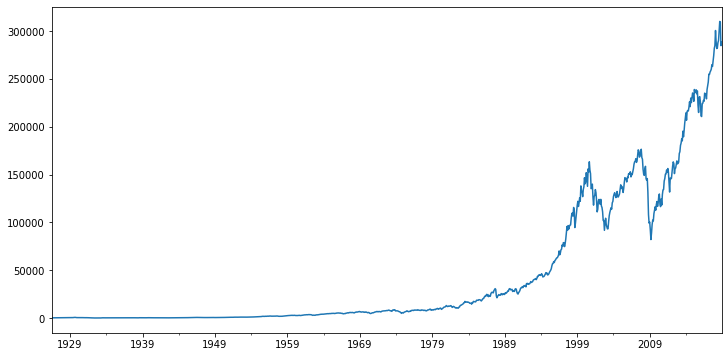

In [51]:
#Find the total market cap

total_mktcap = ind_mktcap.sum(axis = "columns")
total_mktcap.plot(figsize=(12 , 6))

In [52]:
#we want the capitalisation weight

ind_capweight = ind_mktcap.divide(total_mktcap, axis = "rows")
ind_capweight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


<AxesSubplot:>

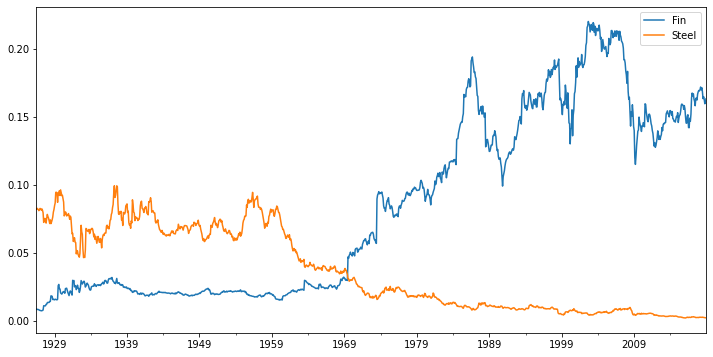

In [53]:
ind_capweight[["Fin", "Steel"]].plot(figsize= (12 , 6))

<AxesSubplot:>

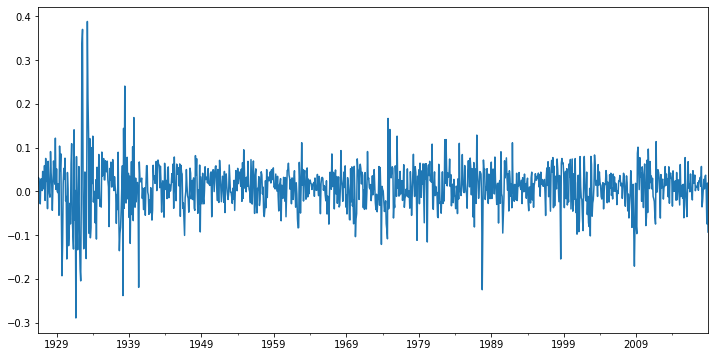

In [54]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")
total_market_return.plot(figsize=(12 ,6))

<AxesSubplot:title={'center':'Total Market CapWeighted Index : 1928-2018'}>

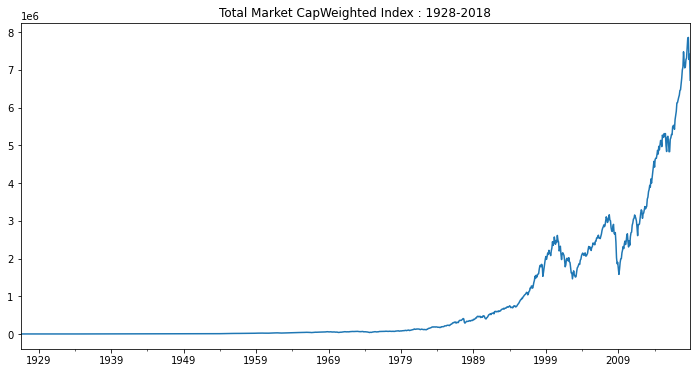

In [55]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize = (12 , 6), title = "Total Market CapWeighted Index : 1928-2018")



<AxesSubplot:>

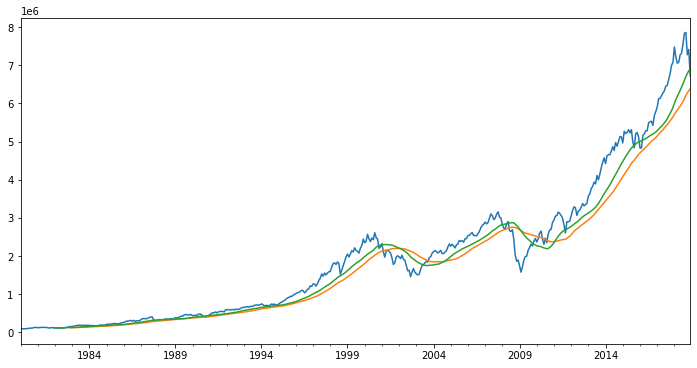

In [56]:
#Plotting index + moving average

total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window =36).mean().plot(figsize=(12, 6))#rolling is a time series, will compute another time series of 36 month
total_market_index["1980":].rolling(window =24).mean().plot(figsize=(12, 6))

<AxesSubplot:>

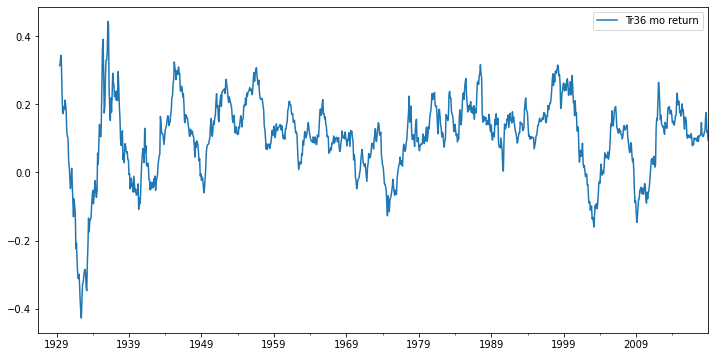

In [57]:
tmi_tr36mrets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, 12) #Total Market Index Trailling 36 months return
tmi_tr36mrets.plot(figsize=(12,6), label = "Tr36 mo return", legend = True)
#total_market_return.plot(label="Returns", legend=True)

# We want to Check if there's correlation in the down market

 ## Rolling Correlation - along with MultiIndex and .groupby

In [59]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail() #There is two index (date and category)

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [63]:
ts_corr.index.names = ["date", "industry"] #Name the two index
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<AxesSubplot:xlabel='date'>

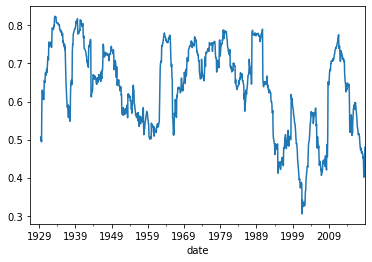

In [65]:
ind_tr36corr = ts_corr.groupby(level = "date").apply(lambda cormat: cormat.values.mean() )
ind_tr36corr.plot()

<AxesSubplot:>

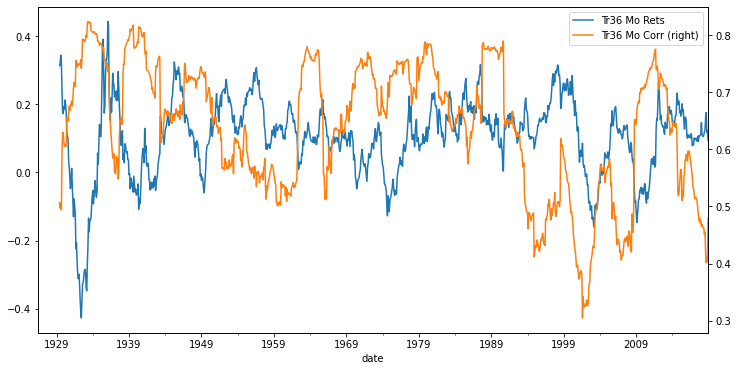

In [73]:
tmi_tr36mrets.plot(label = "Tr36 Mo Rets", figsize = (12,6), legend = True)
ind_tr36corr.plot(label = "Tr36 Mo Corr", legend = True, secondary_y =True)

In [74]:
tmi_tr36mrets.corr(ind_tr36corr)

#Diversification doesn't help you when market are crashing

-0.28010065062884